In [28]:
import pandas as pd
data = pd.read_csv("wildfireData.csv")

/Users/RSM/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
# Printing the column names

data.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [30]:
# Printing the columns that have NAs and NaNs

x = data.isna().sum()
for i in range(len(x)): 
    if (x[i] > 0):
        print("{}\n{}\n".format(x.index[i],x[i]))

LOCAL_FIRE_REPORT_ID
1459286

LOCAL_INCIDENT_ID
820821

FIRE_CODE
1555741

FIRE_NAME
960479

ICS_209_INCIDENT_NUMBER
1854748

ICS_209_NAME
1854748

MTBS_ID
1869462

MTBS_FIRE_NAME
1869462

COMPLEX_NAME
1875282

DISCOVERY_TIME
882638

CONT_DATE
891531

CONT_DOY
891531

CONT_TIME
972553

COUNTY
678148

FIPS_CODE
678148

FIPS_NAME
678148



In [31]:
data = data.drop(['Shape'], axis = 1)
print(data.shape)
data.head()

(1880465, 38)


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,0.10,A,40.036944,-121.005833,5,USFS,CA,63,63.0,Plumas
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,0.25,A,38.933056,-120.404444,5,USFS,CA,61,61.0,Placer
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,0.10,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA,17,17.0,El Dorado
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,0.10,A,38.559167,-119.913333,5,USFS,CA,3,3.0,Alpine
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,0.10,A,38.559167,-119.933056,5,USFS,CA,3,3.0,Alpine


STATE
CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
NJ     25949
PR     22081
WV     21967
VA     21833
MO     17953
NV     16956
ND     15201
WY     14166
ME     13150
AK     12843
MI     10502
HI      9895
PA      8712
NE      7973
KS      7673
CT      4976
IA      4134
MD      3622
OH      3479
MA      2626
NH      2452
IL      2327
IN      2098
RI       480
VT       456
DE       171
DC        66
Name: OBJECTID, dtype: int64


<IPython.core.display.Javascript object>


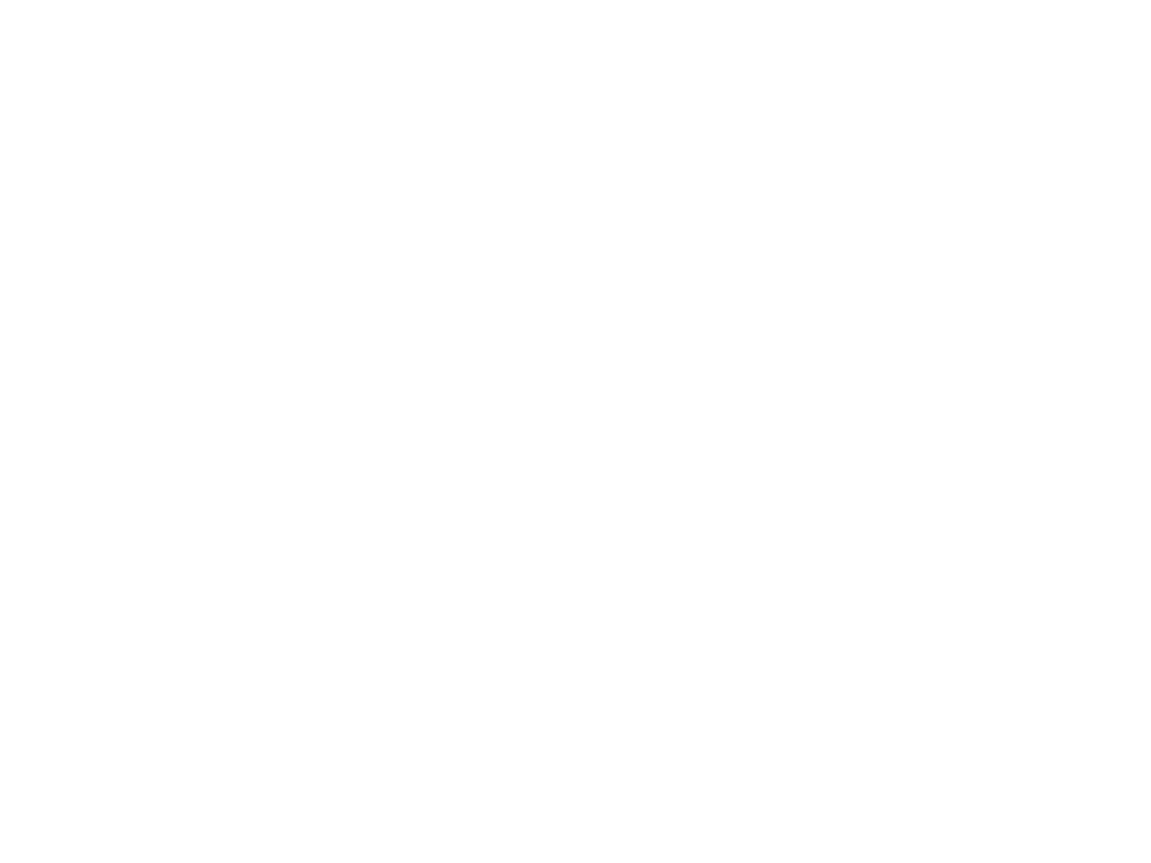

<BarContainer object of 10 artists>

In [32]:
# Number of Fires By State
NoOfFiresByState = (data.groupby("STATE")["OBJECTID"].count()).sort_values(ascending = False)
print(NoOfFiresByState)

import matplotlib.pyplot as plt
%matplotlib notebook
plt.bar(x=NoOfFiresByState.index[:10], height = NoOfFiresByState.values[:10])


In [33]:
# Listing the Different Causes of Fire
FireCauses = (data.groupby(["STAT_CAUSE_DESCR"], as_index = False)["OBJECTID"].count()).sort_values(by = ['OBJECTID'],ascending = False)
print(FireCauses)
print()

# Listing the Wildfire Incidents By State for Each Cause of Fire
NoOfFiresByStateAndCause = (data.groupby(["STAT_CAUSE_DESCR","STATE"], as_index = False)["OBJECTID"].count())#.sort_values(ascending = False)
print(NoOfFiresByStateAndCause)


     STAT_CAUSE_DESCR  OBJECTID
3      Debris Burning    429028
7       Miscellaneous    323805
0               Arson    281455
6           Lightning    278468
8   Missing/Undefined    166723
4       Equipment Use    147612
1            Campfire     76139
2            Children     61167
11            Smoking     52869
10           Railroad     33455
9           Powerline     14448
5           Fireworks     11500
12          Structure      3796

    STAT_CAUSE_DESCR STATE  OBJECTID
0              Arson    AK       458
1              Arson    AL     21826
2              Arson    AR     10377
3              Arson    AZ      5341
4              Arson    CA     19635
5              Arson    CO       844
6              Arson    CT       576
7              Arson    DC        18
8              Arson    DE        21
9              Arson    FL      7169
10             Arson    GA     29757
11             Arson    HI        10
12             Arson    IA       112
13             Arson    ID      1

<IPython.core.display.Javascript object>


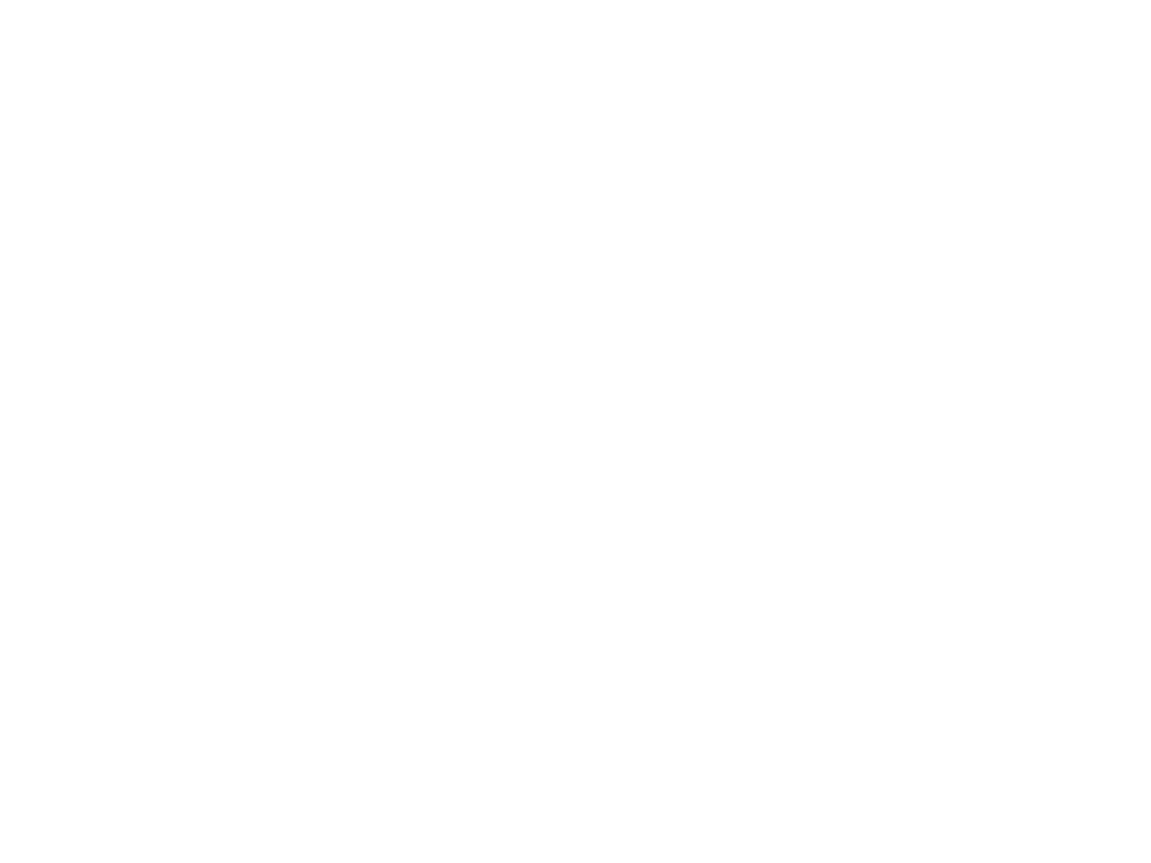

In [34]:
# Ranking States by the cause of fire

from matplotlib.gridspec import GridSpec

fig = plt.figure()
gs = GridSpec(13,1,figure = fig)

for i in range(FireCauses.STAT_CAUSE_DESCR.size):
    X_df = (NoOfFiresByStateAndCause[NoOfFiresByStateAndCause["STAT_CAUSE_DESCR"] == FireCauses['STAT_CAUSE_DESCR'][i]]).sort_values(by=['OBJECTID'], ascending = False)
    fig.add_subplot(gs[i,0])
    plt.bar(x = X_df.STATE[:10], height = X_df.OBJECTID[:10])
    plt.xlabel('States')
    plt.ylabel('{}'.format(FireCauses['STAT_CAUSE_DESCR'][i]))
    
    
    

In [35]:
FireCauses['STAT_CAUSE_DESCR']

3        Debris Burning
7         Miscellaneous
0                 Arson
6             Lightning
8     Missing/Undefined
4         Equipment Use
1              Campfire
2              Children
11              Smoking
10             Railroad
9             Powerline
5             Fireworks
12            Structure
Name: STAT_CAUSE_DESCR, dtype: object

In [36]:
data.columns = [i.replace('_',' ').lower() for i in data.columns]

In [37]:
data.columns

Index(['objectid', 'fod id', 'fpa id', 'source system type', 'source system',
       'nwcg reporting agency', 'nwcg reporting unit id',
       'nwcg reporting unit name', 'source reporting unit',
       'source reporting unit name', 'local fire report id',
       'local incident id', 'fire code', 'fire name',
       'ics 209 incident number', 'ics 209 name', 'mtbs id', 'mtbs fire name',
       'complex name', 'fire year', 'discovery date', 'discovery doy',
       'discovery time', 'stat cause code', 'stat cause descr', 'cont date',
       'cont doy', 'cont time', 'fire size', 'fire size class', 'latitude',
       'longitude', 'owner code', 'owner descr', 'state', 'county',
       'fips code', 'fips name'],
      dtype='object')

In [39]:
feature_list = ['objectid','fire year', 'discovery date', 'discovery doy',
       'discovery time', 'stat cause code', 'stat cause descr', 'cont date',
       'cont doy', 'cont time', 'fire size', 'fire size class', 'latitude',
       'longitude', 'owner code', 'owner descr', 'state']
data = data[feature_list]

In [40]:
factors = ['fire year', 'discovery doy', 'discovery time', 'stat cause code', 'cont time', 'fire size']
data[factors].describe()

,fire year,discovery doy,discovery time,stat cause code,cont time,fire size
count,1.880465e+06,1.880465e+06,997827.000000,1.880465e+06,907912.000000,1.880465e+06
mean,2.003710e+03,1.647191e+02,1453.014326,5.979037e+00,1534.832080,7.452016e+01
std,6.663099e+00,9.003891e+01,405.960963,3.483860e+00,432.737694,2.497598e+03
min,1.992000e+03,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e-05
25%,1.998000e+03,8.900000e+01,1240.000000,3.000000e+00,1310.000000,1.000000e-01
50%,2.004000e+03,1.640000e+02,1457.000000,5.000000e+00,1600.000000,1.000000e+00
75%,2.009000e+03,2.300000e+02,1708.000000,9.000000e+00,1810.000000,3.300000e+00
max,2.015000e+03,3.660000e+02,2359.000000,1.300000e+01,2359.000000,6.069450e+05


# Exploring number of occurences of fires by year

<IPython.core.display.Javascript object>


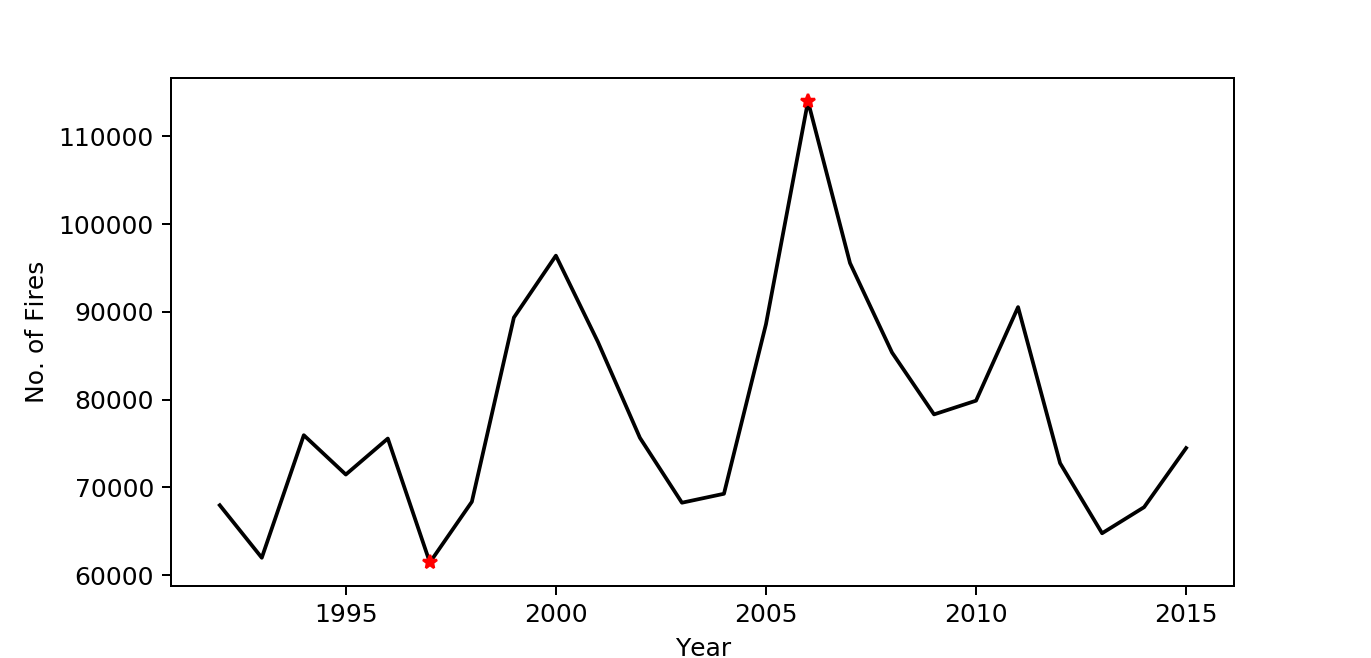

fire year
2006    114004
2000     96416
2007     95573
2011     90552
1999     89363
2005     88604
2001     86587
2008     85378
2010     79889
2009     78325
1994     75955
2002     75656
1996     75574
2015     74491
2012     72769
1995     71472
2004     69279
1998     68370
2003     68261
1992     67975
2014     67753
2013     64780
1993     61989
1997     61450
Name: objectid, dtype: int64


In [90]:
y = (data.groupby(['fire year']))['objectid'].count()
plt.plot(y.index , y.values,c ='black')
plt.plot(y.index[y == min(y)], min(y), 'r*')
plt.plot(y.index[y == max(y)], max(y), 'r*')
plt.xlabel("Year")
plt.ylabel("No. of Fires")
print(y.sort_values(ascending = False))

From the analysis above it is clear that the year 2006 has the most number of fire occurences and 1997 has the least. One of our first hypotheses was that the occurence of a fire would strongly correlate with the climate data. More preciseley, as one of the main reasons for a fire is high temperature, the increasing global temperature (show in the figure below) should cause more fires with each passing year.


![](GlobalAverage_2018.png "http://berkeleyearth.org/2018-temperatures/")


However, as our data also includes fires due to non-natural causes, we extract the naturally caused fires to explore the relevance of our hypothesis.

stat cause descr  fire year
Debris Burning    2006         25951
                  1999         22343
                  2000         21790
                  2001         21377
                  2014         19860
                  2010         19835
                  2011         19524
                  2002         19269
                  2008         18825
                  2005         18703
                  2007         18703
                  2009         18402
                  2015         18339
                  2004         16911
                  1996         16827
                  1995         16719
                  2013         16703
                  2012         16613
                  1998         15111
                  1994         14845
                  1997         14750
                  1992         12729
                  2003         12546
                  1993         12353
Name: objectid, dtype: int64


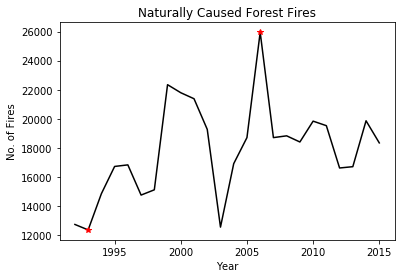

In [150]:
y = (data[data['stat cause descr'] == 'Debris Burning'].groupby(['stat cause descr','fire year']))['objectid'].count()


plt.plot(y.index.levels[1] , y.values,c ='black')
plt.plot(y.index.levels[1][y == min(y)], min(y), 'r*')
plt.plot(y.index.levels[1][y == max(y)], max(y), 'r*')
plt.xlabel("Year")
plt.ylabel("No. of Fires")
plt.title("Naturally Caused Forest Fires")
print(y.sort_values(ascending = False))

The above plot doesn't support our hypothesis that the frequency of forest fires has an increasing trend that mimics the increasing trend of the global temperature. Now, we need to see which factors have been the prominent cause of fire each year. 

Text(0.5, 0, 'Years')

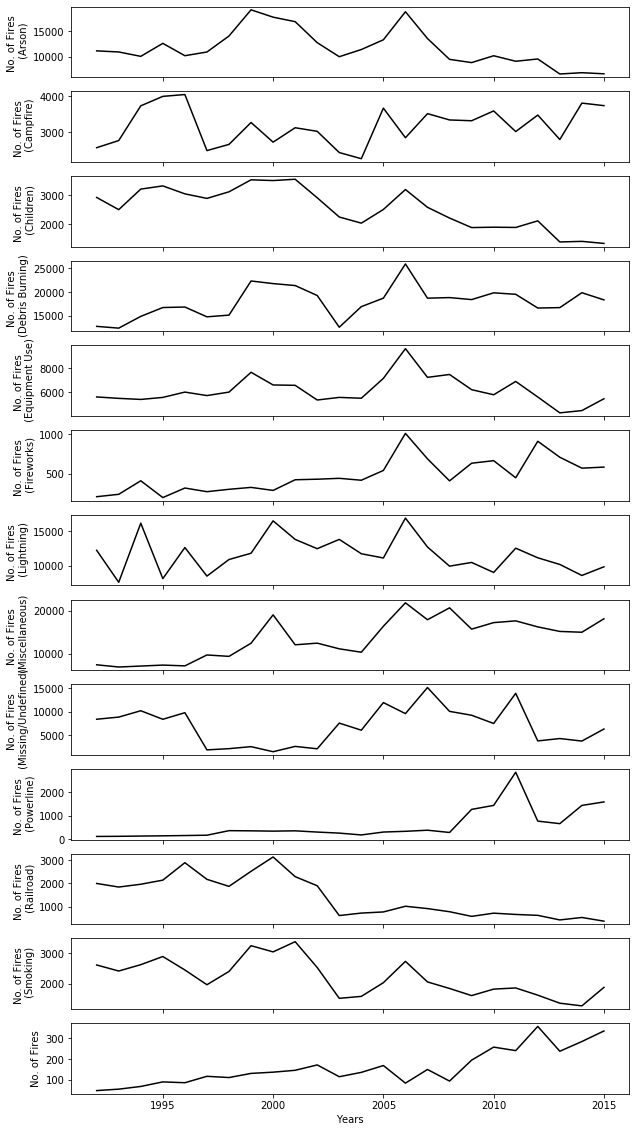

In [197]:
y = (data.groupby(['stat cause descr','fire year']))['objectid'].count()

%matplotlib inline

fig,ax = plt.subplots(13,1,figsize = (10,20), sharex= True)

for i in range(len(y.index.levels[0])):
    ax[i].plot(y[y.index.labels[0]== i].index.levels[1].values, y[y.index.labels[0]== i].values, c = 'black')
    ax[i].set(ylabel = 'No. of Fires \n ({})'.format(y.index.levels[0][i]))

plt.ylabel('No. of Fires')
9plt.xlabel('Years')
    

On analyzing the frequency of fires based on their cause, it can be clearly observed that fires due to smoking, railroad, equipment use, children and arson have a decreasing trend. Fires due to campfire and debris burning don't show any significant trend. Finally, causes such as structural fire, powerline, fireworks show an increasing trend. It is important to notice that in the year 2006 there was an increase in fires due to smoking, lightning, fireworks, debris burning, children and arson. Some of these trends such as increase in structural fires can be explained by the increase in number of houses and buildings over the years. [Need to explore this]

Next, we explore the 5 main causes of fire in each state and how that has changed over time 

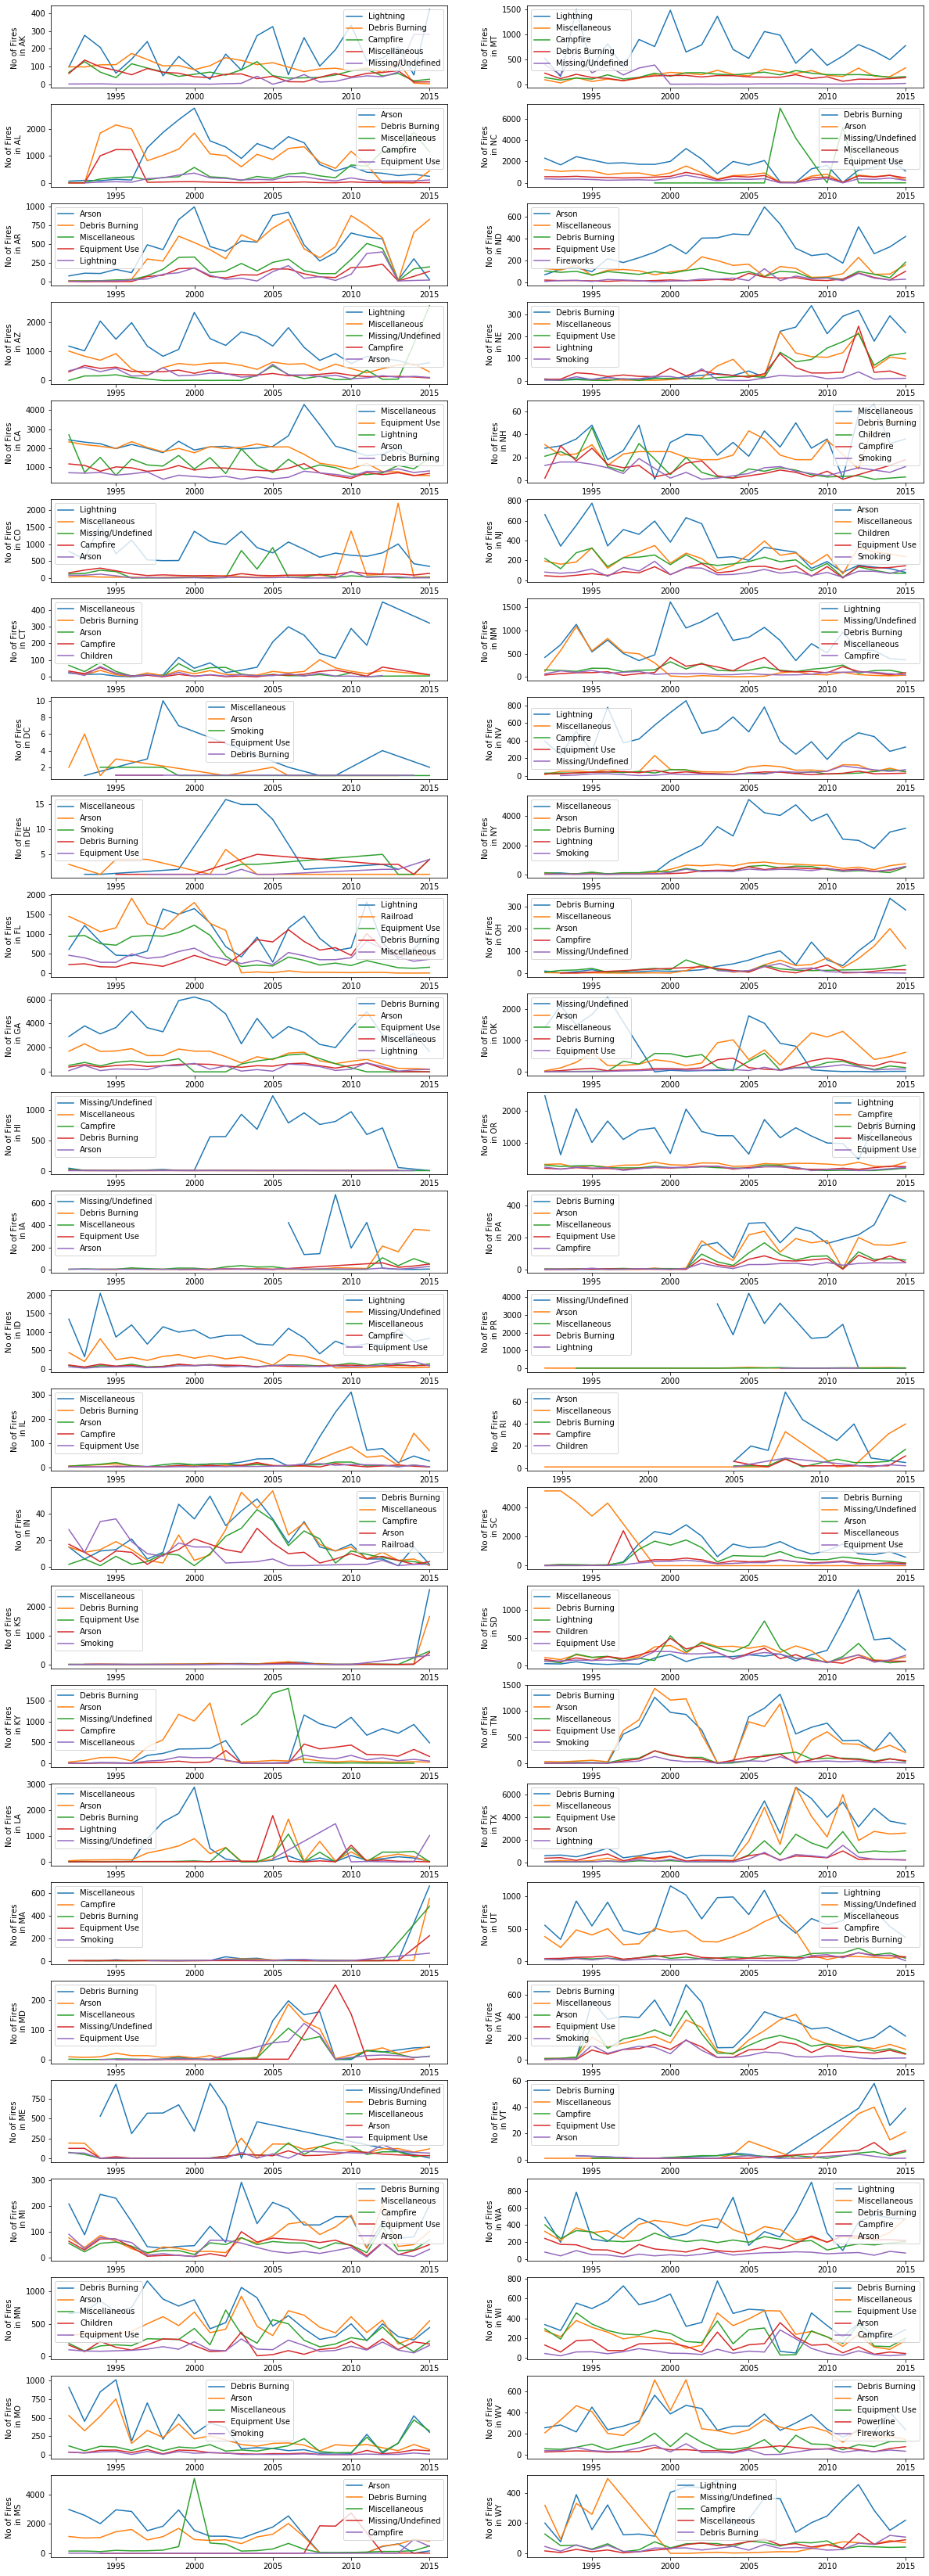

In [298]:
z = (data.groupby(['state','stat cause descr']))['objectid'].count()

state_list = z.index.levels[0]
x = []
for i in range(len(state_list)):
    x.append(z[z.index.levels[0][i]].sort_values(ascending = False).index[:5])


y = (data.groupby(['state','stat cause descr','fire year']))['objectid'].count()

state_list = y.index.levels[0]

fig, ax = plt.subplots(26,2,figsize = (20,60))

for i in range(len(state_list)):
    j = i//26
    k = i - (j*26)
    
    stat_cause_list = []
    
    for l in x[i]:
        
        ax[k,j].plot(y[y.index.levels[0][i]][l].index, 
                     y[y.index.levels[0][i]][l].values,
                    label = l)
        ax[k,j].set(ylabel = 'No of Fires \n in {}'.format(state_list[i]))
    ax[k,j].legend()

    


It can be observed that almost all the states are unique when it comes to the causes for these fires and the trends in these causes over the years. We will need a model which will be able to capture this spatio-temporal nature of the data.

In [322]:
z = (data.groupby(['owner descr']))['objectid'].count().sort_values(ascending = False)
owners = list(z.index[:9])
sub_data = data.loc[data['owner descr'].isin(owners)]
y = (sub_data.groupby(['owner descr','fire year']))['objectid'].count()

Text(0.5, 0, 'Years')

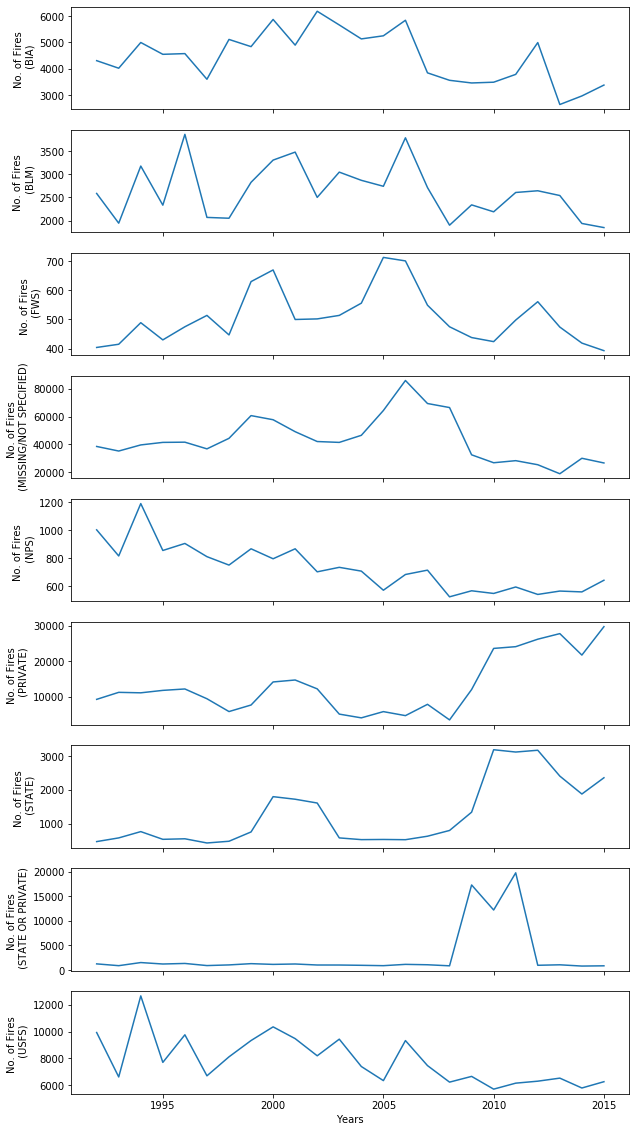

In [321]:
fig,ax = plt.subplots(9,1,figsize = (10,20), sharex= True)

for i in range(len(y.index.levels[0])):
    ax[i].plot(y[y.index.levels[0][i]].index, y[y.index.levels[0][i]].values,)
    ax[i].set(ylabel = 'No. of Fires \n ({})'.format(y.index.levels[0][i]))
plt.xlabel('Years')
    

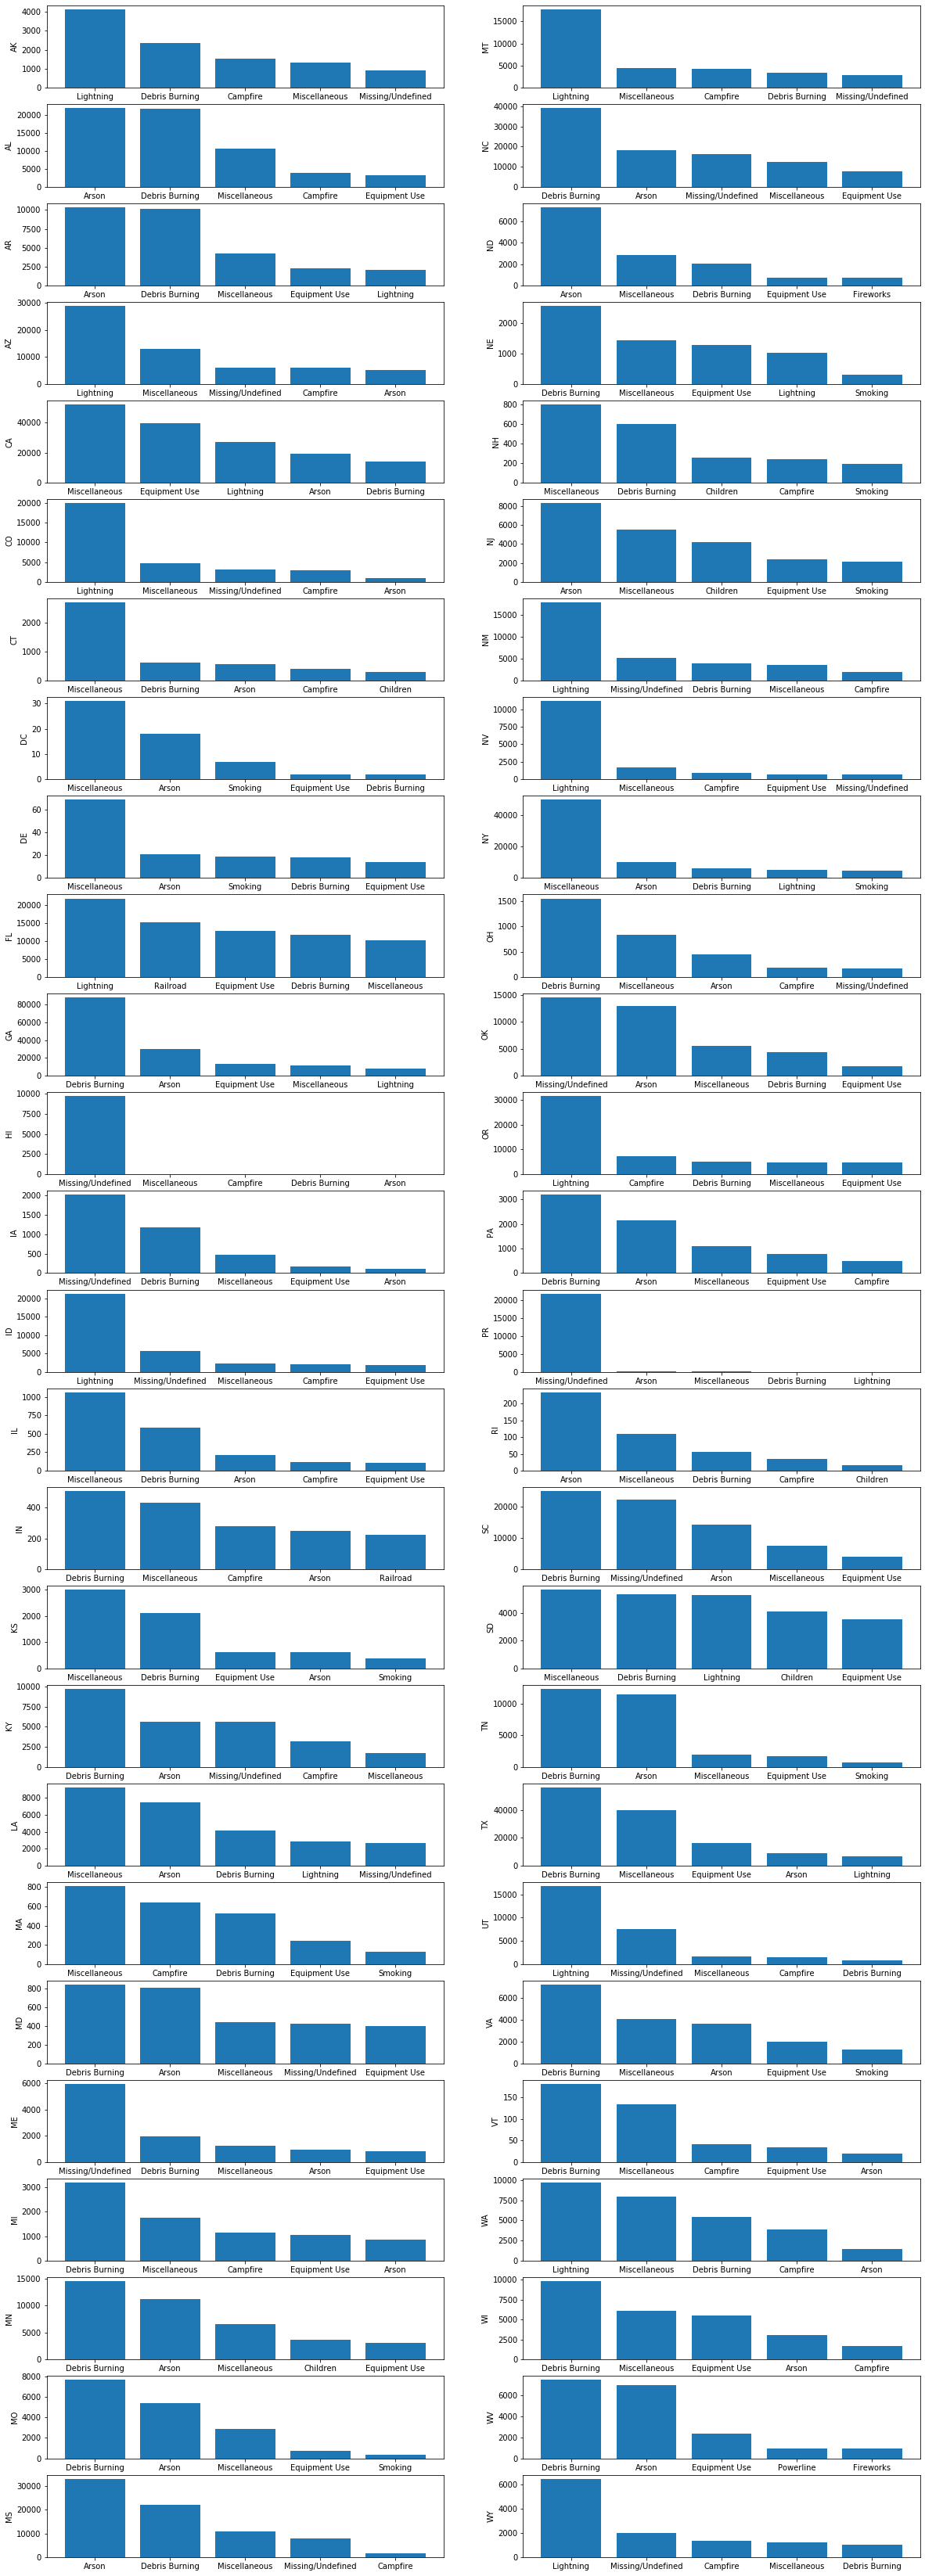

In [247]:
y = (data.groupby(['state','stat cause descr']))['objectid'].count()

state_list = y.index.levels[0]

fig, ax = plt.subplots(26,2,figsize = (20,60))

for i in range(len(state_list)):
    j = i//26
    k = i - (j*26)
    ax[k,j].bar(x = y[y.index.levels[0][i]].sort_values(ascending = False).index[:5], 
            height = y[y.index.levels[0][i]].sort_values(ascending = False).values[:5])
    ax[k,j].set(ylabel = state_list[i])
    
